Continuing integration:
- we're spending time on integration because it helps us understand the process of optimizing a numerical technique, but it's already a solved problem
- looked at accuracy and approximation error vs roundoff error
- adaptive integration allows us to converge on a solution that's at the level of precision we want - see slides for steps

Romberg integration:
- even better than adaptive integration
- sounds insane at first
- use the error estimate to try to correct our results
- accurate to third order like simpson's but is based on the trapezoid rule
- then do multiple round of further integration and correction to increase the order of accuracy
- this doesn't require more calculation than adaptive integration because you would do increased step size calculations anyways, but the answers are much more accurate
- this is basically a series expansion around the step size h and the accuracy is only improved if the series converges quickly, which it should as long as the integral is well behaved and doesn't have wild fluctuations, singularties, lots of noise - called Richardson Extrapolation

Higher order methods:
- can get to a higher order by using a higher order polynomial to fit each slice
- just need to re-weight the different points
- the Newton-Cotes formula can be used for calculating any higher older method

Gaussian quadrature:
- instead of evenly spacing the points, can be used with a nonuniform set of N points
- useful if your experimental data only has a given number of points (not using an actual function)
- for quadrature in general, you have more points in areas where the function is changing more and fewer where the function is changing less
- for gaussian, points are denser but weighted less closer to ends of the bounds
- see slides for more details

In [6]:
import sys
import os

#asked claude how to do this since the chatgpt solution didn't work
sys.path.append(os.path.join('..', 'importantfunctions'))

In [7]:
from gaussxw import *

In [8]:
def f(x):
    return x**4-2*x+1

In [9]:
points,weights=gaussxwab(3,0,2)
print(points)
print(weights)

[1.77459667 1.         0.22540333]
[0.55555556 0.88888889 0.55555556]


In [10]:
def gaussquad(function,a,b,N=3):
    points,weights=gaussxwab(N,a,b)
    mysum=0
    for k in range(0,N):
        mysum+=weights[k]*function(points[k])
    return mysum

In [11]:
gaussquad(f,0,2)

4.4000000000000075

In [12]:
gaussquad(f,0,2,5)

4.400000000000018

In [13]:
gaussquad(f,0,2,5)>gaussquad(f,0,2)

True

In [14]:
gaussquad(f,0,2,9)

4.4000000000000155

In [15]:
gaussquad(f,0,2,9)>gaussquad(f,0,2,3)

True

In [16]:
import numpy as np

In [17]:
Ns=np.arange(3,15,2)

In [18]:
Is=np.zeros(6)

In [19]:
for i in range(6):
    I=gaussquad(f,0,2,Ns[i])
    Is[i]=I

In [20]:
import matplotlib.pyplot as plt

(4.3999999999956065, 4.400000000004422)

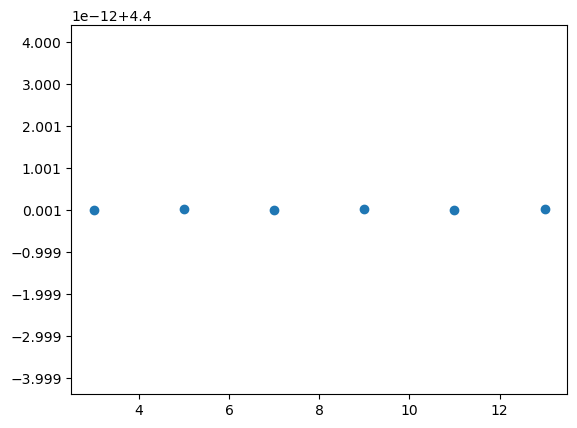

In [21]:
plt.scatter(Ns,Is)
plt.ylim()

(4.39999999999995, 4.40000000000005)

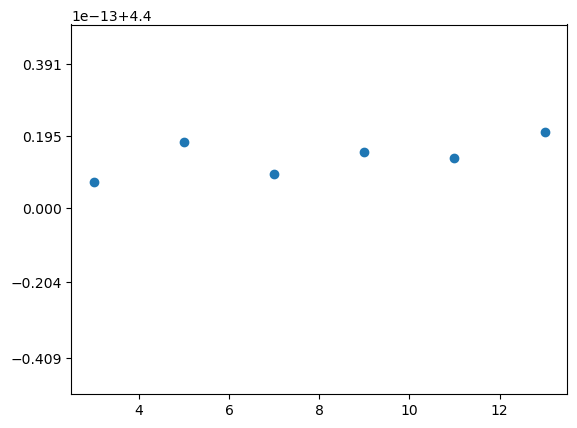

In [22]:
plt.scatter(Ns,Is)
plt.ylim(4.39999999999995, 4.40000000000005)

Error on gaussian quadrature:
- increasing N by 1 gives a hundred fold increase in accuracy
- can't do nesting because when you double the number of points, there's no point overlap 

Choosing an integration:
- higher order methods will give you an accurate answer in few steps if the integrand is well behaved
- for problematic integrands, higher order methods may not converge well and simpler methods like trapezoidal might work better
- can just plot some points and see if it looks like a function vs points all over the place to know if it's well behaved
- even spacing or not is also a consideration
- can also see if different methods agree
- try a method and check conversion to see if you are getting towards the right answer
- will cover Monte Carlo integration later

Infinite bounds: 
- can't integrate from 0 to infinity numerically
- so do a change of variables with x=z/(1-z) and then z as your interation variable
- so integral from 0 to inf of f(x)dx becomes integral from 0 to 1 of 1/(z-1)^2 times f(z/(1-z))dz
- there are other choices for substitution - see slides
- can break it up into chunks like -inf to 0 and 0 to +inf

Multiple dimension integrals:
- can just do one integral and then the next
- get the Gauss-Legendre product formula - see slides
- point choices becomes more complicated because you have to determine spacing in each dimension
- don't have an optimal point distribution like gaussian distribution in 1D and it's not clear if that is a solvable problem
- one way: Sobol sequence
- another: Monte Carlo - basically just choosing randomly and will cover later
- could also have variable limits instead of finite limits - this can cause an issue where the points are closer together in one part of the space than another - see slides

Scipy package has most of these built into the sub-package integrate:
- quad, dblquad, tplquad do multidimensional integration
- also quadrature() and romberg()
- trapezoid() and simpson() are designed to take an array of values instead of a function